In [249]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [250]:
X, y = make_classification(n_samples=50000, n_features=11, n_informative=11, n_redundant=0, n_clusters_per_class=1, n_classes=10, random_state=42)

In [251]:
df = pd.DataFrame(X, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
df['quality'] = y

In [252]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.135428,0.022957,-0.859987,-1.914723,-0.755849,-3.974395,2.705867,1.519474,-1.801757,2.626007,0.293269,1
1,-2.421290,2.304533,-2.916852,1.775244,0.680650,1.835830,-0.384676,-1.310471,-1.128382,0.659783,0.360420,0
2,-1.342147,-2.713764,-3.066763,1.279014,3.930891,0.683757,0.540418,3.095344,-2.178153,-0.259510,0.136298,7
3,2.635085,3.126342,1.736001,3.902437,3.230380,-1.592174,-3.954798,-0.158770,0.148889,6.441075,-0.384098,6
4,-1.912999,0.763131,0.650817,-4.307829,-0.373689,2.510370,1.696082,2.482520,0.130570,-3.258717,0.488569,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.611574,1.681701,2.813174,-2.303899,-2.102586,-1.594775,-4.289627,-4.522783,-0.324901,-0.695703,0.255930,7
49996,-3.639380,-1.325727,-0.695030,1.174747,0.017017,2.362717,-2.635369,-0.748089,0.237375,0.930982,-2.497822,7
49997,1.807696,-2.454488,-2.230462,0.173196,1.393919,2.983844,-0.883324,-0.495242,2.682251,2.839134,3.658257,6
49998,-0.560963,2.172927,-0.924256,-1.172709,2.157484,3.133567,0.551861,0.218004,1.060667,3.699764,-0.499112,8


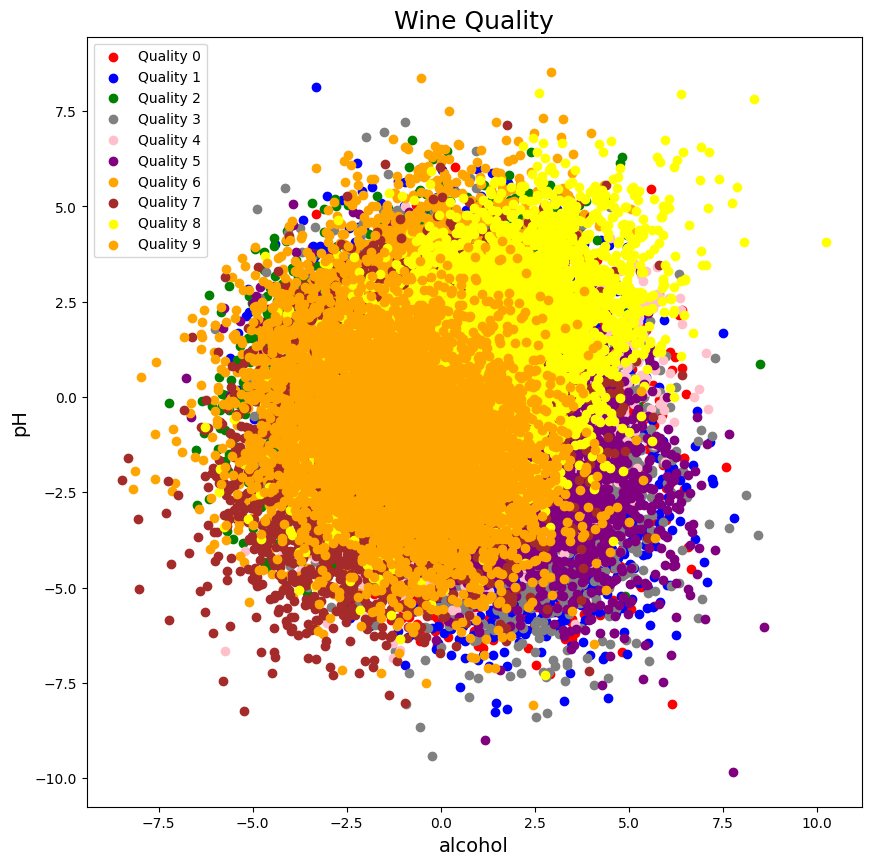

In [253]:
colors = ['red', 'blue', 'green', 'grey', 'pink',  'purple', 'orange', 'brown', 'yellow', 'orange']
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(df["alcohol"][df["quality"] == i],
                df["pH"][df["quality"] == i],
                c=colors[i], label=f"Quality {i}")
plt.title("Wine Quality", fontsize=18)
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend()
plt.show()

## Division del conjunto de datos

In [254]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.1)

## Entrenamiento del algoritmo

In [255]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=25000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=25000, n_jobs=-1, random_state=40)

In [256]:
clf.coef_.shape # 10 classes, 11 features

(10, 11)

In [257]:
clf.coef_ # weights

array([[-7.76874476e+00,  4.70919096e+00, -2.60758739e+00,
         1.70227520e+00, -3.93796144e+00,  6.85366226e+00,
        -6.80008114e+00, -3.54294259e+00, -8.07005321e+00,
         2.25613275e+00, -5.01786184e+00],
       [-5.91998601e+00, -5.49884595e+00,  1.11923703e+01,
        -7.51949411e-01,  2.41510416e+00, -3.47383769e+00,
         3.06437651e+00,  2.93679362e+00, -7.14792495e+00,
         8.31672969e+00,  9.27965810e+00],
       [ 1.12862162e+01,  7.17940609e+00, -2.84921935e+00,
         4.13331483e+00, -1.07656978e+01,  4.27139209e+00,
        -4.71080603e+00,  3.06731808e+00,  8.31629654e+00,
        -3.24349060e+00, -1.01994769e+01],
       [ 6.64091991e+00, -1.30534890e+01,  2.53963352e+00,
        -2.63970946e+00, -1.24685794e-03,  8.41611530e+00,
         5.65699901e-01,  7.82610990e+00, -8.50977654e+00,
        -5.21496858e+00,  6.13408299e+00],
       [ 3.41062871e+00,  5.84012903e+00,  7.05035996e+00,
         1.70916545e+00, -1.74137829e+00, -4.35719389e+00,
  

In [258]:
clf.intercept_ # valor del bias

array([-63., -51., -61., -71., -47., -53., -54., -60., -48., -42.])

## Prediccion con el conjunto de pruebas

In [259]:
y_pred = clf.predict(X_test)

In [260]:
len(y_pred)

5000

In [261]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="micro")

np.float64(0.4886)